In [1]:
# Core Imports
import numpy as np
from utils.data import getClassifierData
from utils.reporter import ModelEvaluationHarness
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

# Implementation Specific Imports
from sklearn.neighbors import KNeighborsClassifier as Classifier


In [2]:
preppedData, preppedTarget = getClassifierData()

accuracy :
 0.828
precision :
 0.9534708565211933
recall :
 0.6899506464407908
f1 :
 0.8005832132944525
classificationReport :
               precision    recall  f1-score   support

       False       0.76      0.97      0.85     32973
        True       0.95      0.69      0.80     33027

    accuracy                           0.83     66000
   macro avg       0.86      0.83      0.82     66000
weighted avg       0.86      0.83      0.82     66000

confusionMatrix :
 [[31861  1112]
 [10240 22787]]
roc_curve :
 {'fpr': array([0.        , 0.03372456, 1.        ]), 'tpr': array([0.        , 0.68995065, 1.        ]), 'thresholds': array([inf,  1.,  0.])}
auc :
 0.8281130419599702


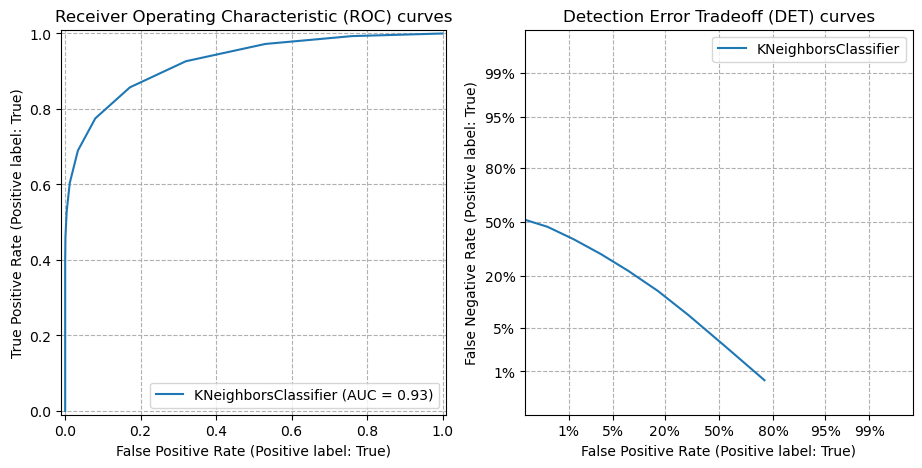

In [3]:

defaultModel = ModelEvaluationHarness(
    Classifier(
        algorithm='ball_tree',
        leaf_size=30,
        n_neighbors=10,
        p=2,
        weights='uniform'
    ),
    Classifier.__name__,
    preppedData,
    preppedTarget
    )

defaultModel.splitData()
defaultModel.train()
defaultModel.predict()
defaultModel.evaluate()
defaultModel.graphROC()
for valuation, value in defaultModel.evaluation.items():
    print(valuation ,':\n', value)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 64 is smaller than n_iter=10000. Running 64 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 455, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 764, in sc

accuracy :
 0.828
precision :
 0.9534708565211933
recall :
 0.6899506464407908
f1 :
 0.8005832132944525
classificationReport :
               precision    recall  f1-score   support

       False       0.76      0.97      0.85     32973
        True       0.95      0.69      0.80     33027

    accuracy                           0.83     66000
   macro avg       0.86      0.83      0.82     66000
weighted avg       0.86      0.83      0.82     66000

confusionMatrix :
 [[31861  1112]
 [10240 22787]]
roc_curve :
 {'fpr': array([0.        , 0.03372456, 1.        ]), 'tpr': array([0.        , 0.68995065, 1.        ]), 'thresholds': array([inf,  1.,  0.])}
auc :
 0.8281130419599702


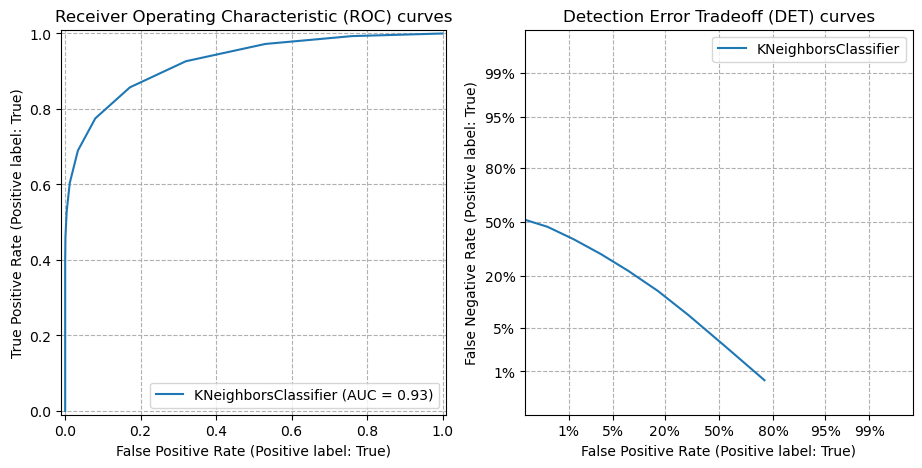

In [4]:
"""Define Classifier Parameter Bounds"""
param_bounds = {
    'n_neighbors': list(range(4,20,2)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

"""Converting target variable to int"""
# numericTarget = [1 if value =='yes' else 0 for value in rawTarget['y].to_list()]

"""Identify Optimal Configuration"""
search = HalvingRandomSearchCV(Classifier(), param_bounds)
search = search.fit(preppedData, preppedTarget)

"""Harness Classifier with Optimal Configuration"""
tuned_evaluator = ModelEvaluationHarness(
    Classifier(**search.best_estimator_.get_params()),
    Classifier.__name__,
    preppedData,
    preppedTarget
)

"""Evaluate Model"""
defaultModel.splitData()
defaultModel.train()
defaultModel.predict()
defaultModel.evaluate()
defaultModel.graphROC()
for valuation, value in defaultModel.evaluation.items():
    print(valuation ,':\n', value)

In [5]:
print(search.best_estimator_.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 16, 'p': 2, 'weights': 'distance'}
